## Apple Stock Price Prediction for the Next 30 Days

### DATA PREPROCESSING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller


In [2]:
df=pd.read_csv(r'C:\DS PROJECT 1\AAPL.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [4]:
df['Date']=pd.to_datetime(df['Date'],format='mixed', dayfirst=True)

#### It converts text dates → actual datetime objects that pandas can understand, calculate, and reason with.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2011 non-null   datetime64[ns]
 1   Open       2011 non-null   float64       
 2   High       2011 non-null   float64       
 3   Low        2011 non-null   float64       
 4   Close      2011 non-null   float64       
 5   Adj Close  2011 non-null   float64       
 6   Volume     2011 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 110.1 KB


In [5]:
df = df.sort_values('Date',ascending=True)

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


#### The date column was in string fromat but now it has been changed to Datetime fromat and sorted the values in ascending and format is changed to Year,Month,Day.

In [9]:
df.shape

(2011, 7)

In [10]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,2011,2016-01-01 03:10:28.344107520,2012-01-03 00:00:00,2014-01-02 12:00:00,2015-12-31 00:00:00,2017-12-28 12:00:00,2019-12-30 00:00:00,NaN
Open,2011.0,126.707469,55.424286,85.882858,113.050003,165.190002,291.119995,50.483753
High,2011.0,127.827594,57.085712,86.717858,114.190002,167.409996,293.970001,50.926301
Low,2011.0,125.580258,55.014286,85.056427,111.870003,163.424995,288.119995,50.12494
Close,2011.0,126.741235,55.790001,86.202145,113.050003,165.245002,291.519989,50.578369
Adj Close,2011.0,119.505548,48.921928,75.056679,105.222908,160.047111,289.522614,52.438444
Volume,2011.0,59496704.724018,11362000.0,27585650.0,43469000.0,74710300.0,376530000.0,46838558.485476


In [11]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

#### We have no duplicates and missing values in this dataset.

#### Before modeling, I inspected dataset structure, missing values and duplicates because time-series forecasting requires clean, continuous data. Any missing dates or values can make the model unstable.

In [7]:
df.set_index('Date',inplace=True)

#### Time series models (ARIMA, LSTM, Prophet) require the timeline as index.

In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


### EDA

## Box Plots For All Numeric Columns (Complete EDA)


In [15]:
# by selecting only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

print("Numeric columns detected:")
print(numeric_cols.tolist())

Numeric columns detected:
['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


##### 1. We select only numeric columns to prevent errors when creating plots or running calculations, since non-numeric data can’t be used in histograms or similar charts.
##### 2. Many EDA methods—like boxplots, histograms, and correlation heatmaps—work only with numeric values.


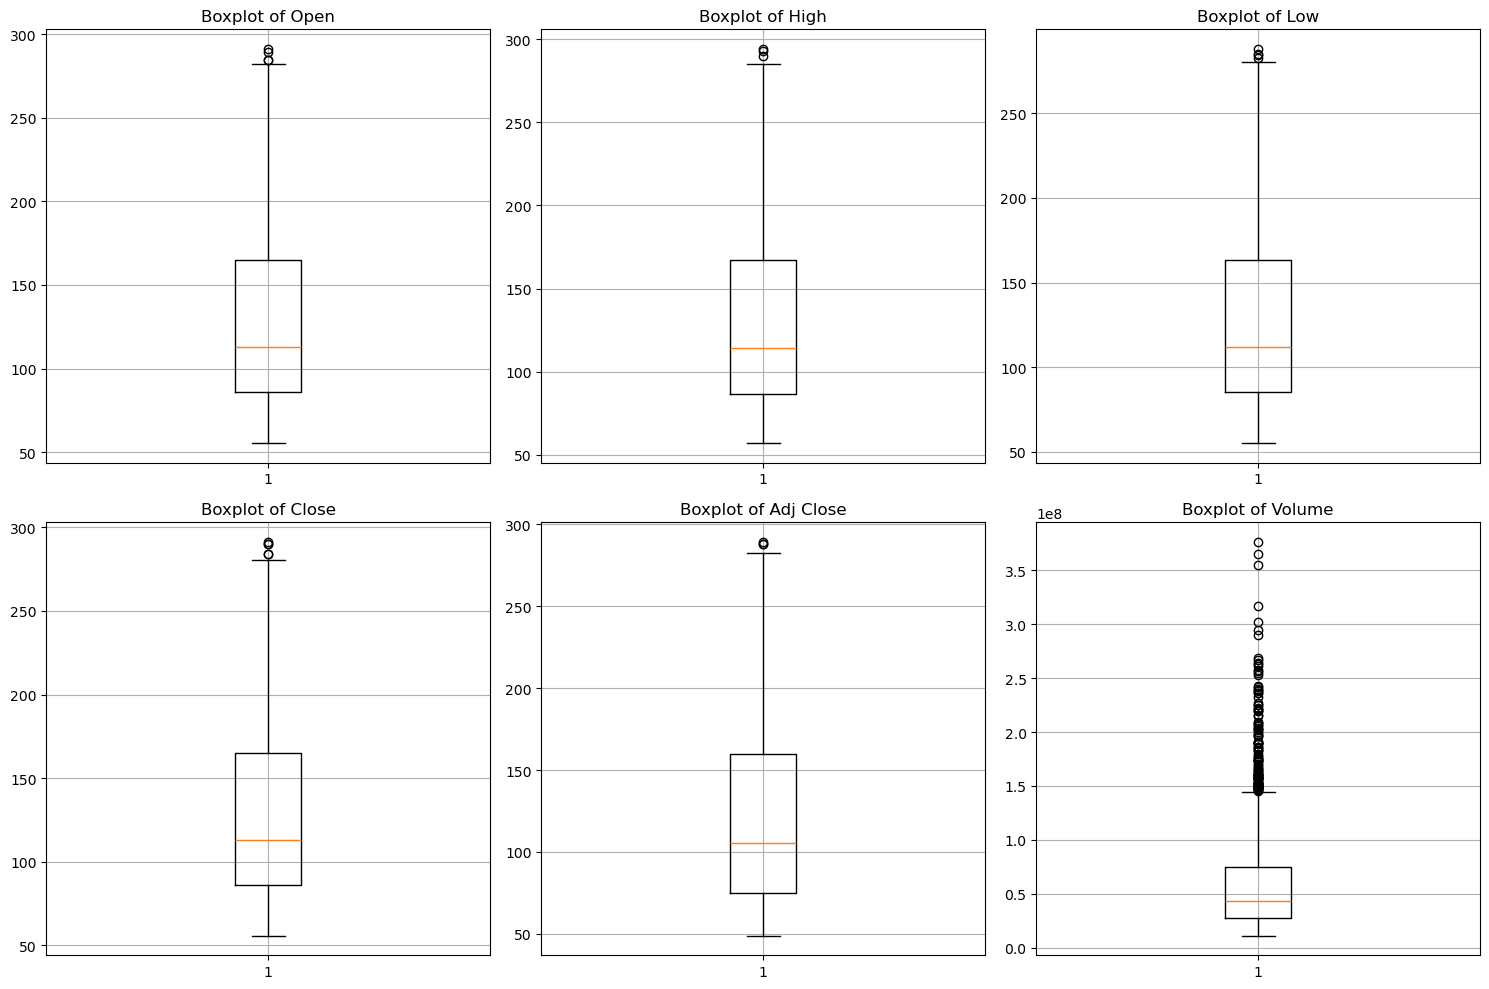

'\nOverall, all price-related columns (Open, High, Low, Close, Adj Close) contain only a few mild outliers, showing stable stock behavior.\n\nIn contrast, Volume has a large number of outliers, indicating that trading activity fluctuates heavily, which is common for stock data.\n\n'

In [16]:
# Plot each numeric column in a grid of boxplots
plt.figure(figsize=(15, 5 * ((len(numeric_cols) + 2) // 3)))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i)
    plt.boxplot(df[col].dropna(), vert=True)
    plt.title(f"Boxplot of {col}")
    plt.grid(True)

plt.tight_layout()
plt.show()


"""
Overall, all price-related columns (Open, High, Low, Close, Adj Close) contain only a few mild outliers, showing stable stock behavior.

In contrast, Volume has a large number of outliers, indicating that trading activity fluctuates heavily, which is common for stock data.

"""

#### Outliers in stock market time-series data represent real market movements, not noise. Therefore, we intentionally did not cap or remove them to preserve the actual trading patterns.

## Histograms For All Numeric Columns (Complete EDA)


Numeric columns detected:
['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


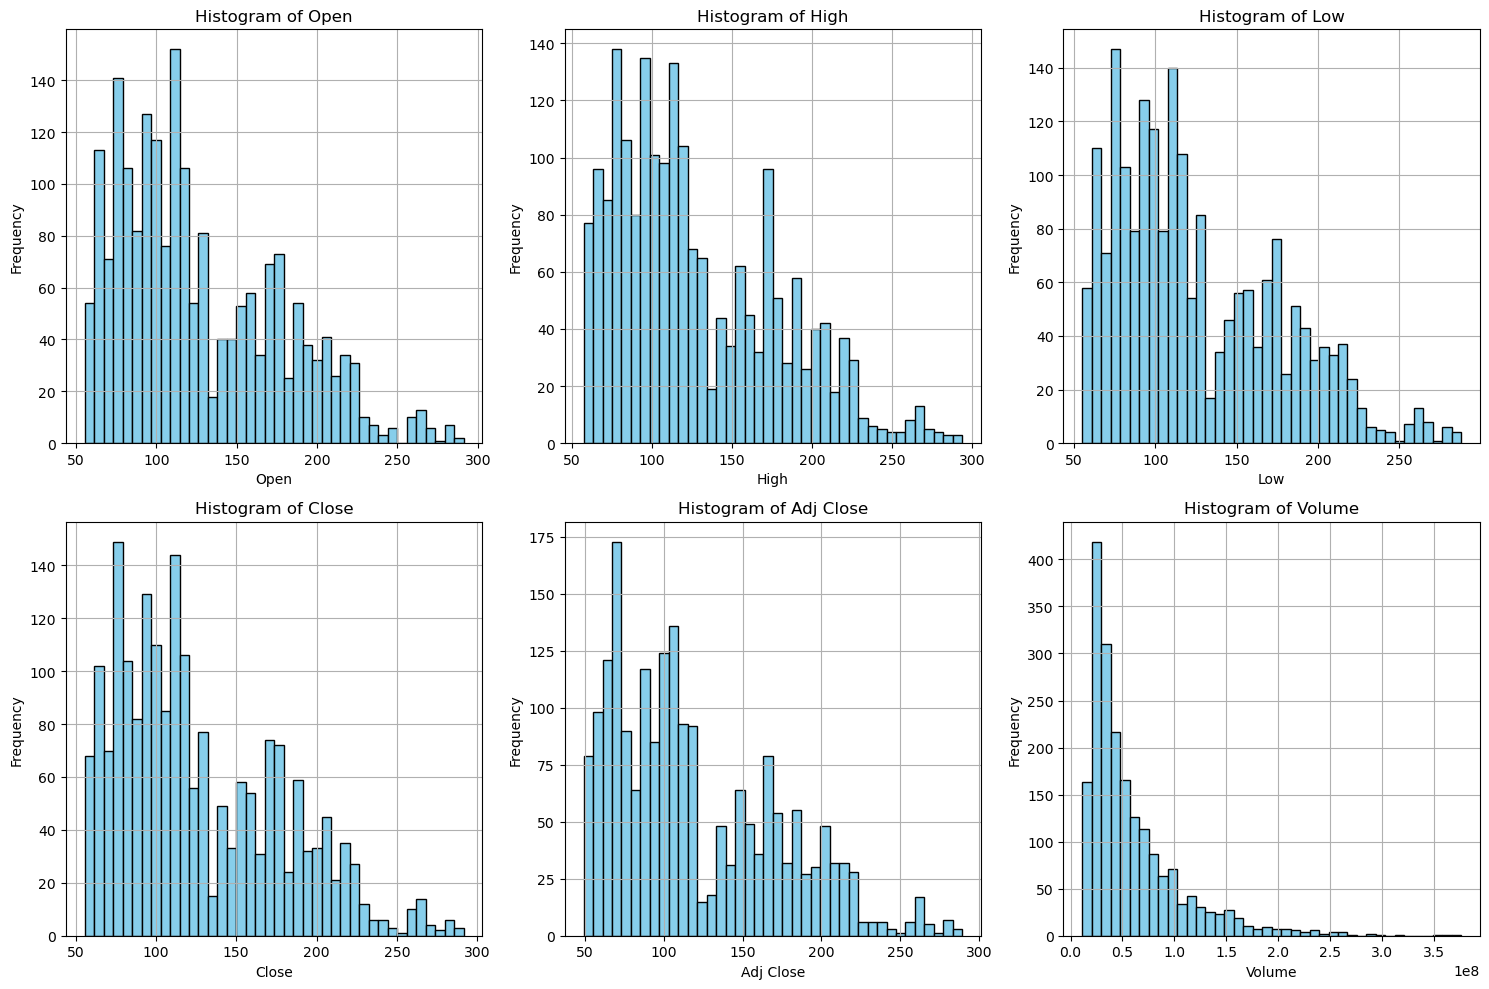

'\nOverall, all price-related numeric columns show a slightly right-skewed distribution, \nindicating the presence of some higher price values but a stable concentration around the mean.\nThe Volume column is heavily right-skewed, reflecting frequent spikes in trading activity.\n\n'

In [17]:
# Select all numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

print("Numeric columns detected:")
print(numeric_cols.tolist())

# Plot histograms
plt.figure(figsize=(15, 5 * ((len(numeric_cols) + 2) // 3)))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i)
    plt.hist(df[col].dropna(), bins=40, color="skyblue", edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)

plt.tight_layout()
plt.show()

'''
Overall, all price-related numeric columns show a slightly right-skewed distribution, 
indicating the presence of some higher price values but a stable concentration around the mean.
The Volume column is heavily right-skewed, reflecting frequent spikes in trading activity.

'''


#### 1. We created histograms for all numeric features to understand how each variable is distributed and to spot any unusual patterns or skewness.
#### 2. This helps us see how values like price changes and trading volume behave over time.
#### 3. Understanding these patterns is important because it guides proper data cleaning and improves the quality of forecasting models.


## Close Price Over Time


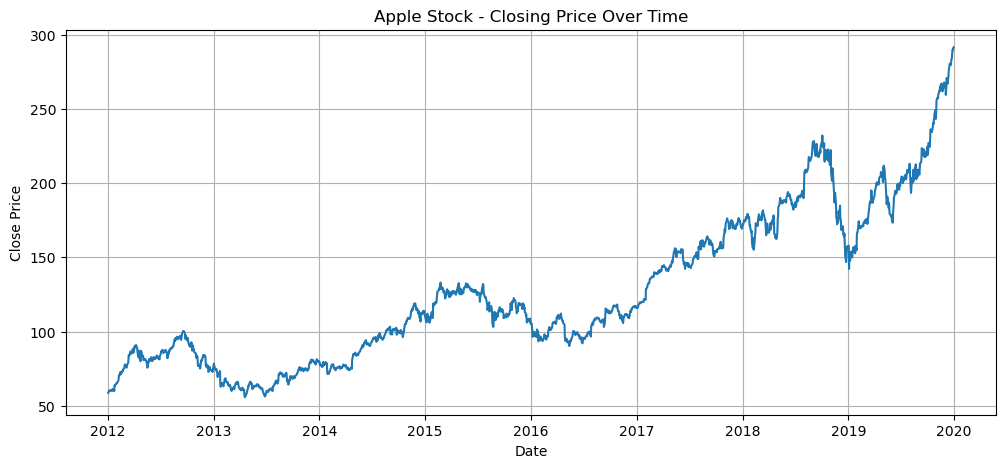

In [18]:

plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Close"])
plt.title("Apple Stock - Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()


### This graph shows how the stock price moved day by day, helping us identify upward trends, falls, and important movements


## Volume Over Time

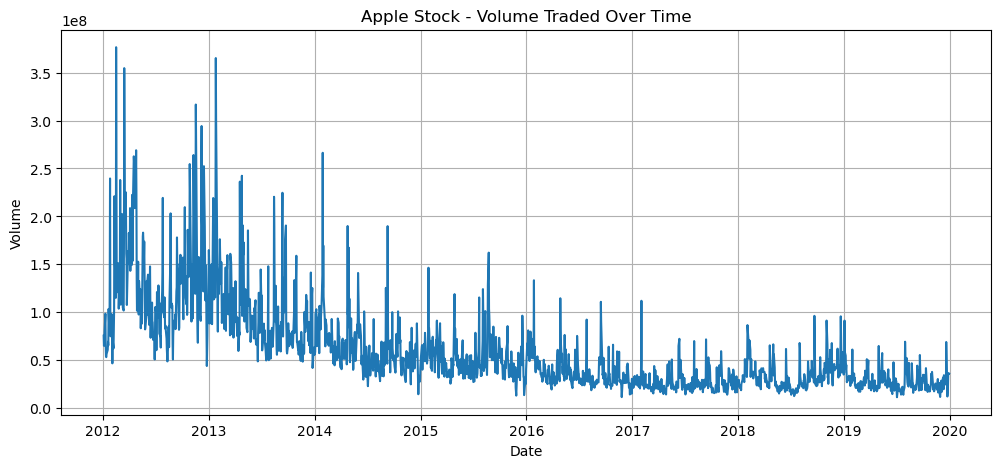

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Volume"])
plt.title("Apple Stock - Volume Traded Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.show()


### This chart shows how much trading happened each day, helping us spot spikes in activity that often relate to important market news.

## Open Price Over Time

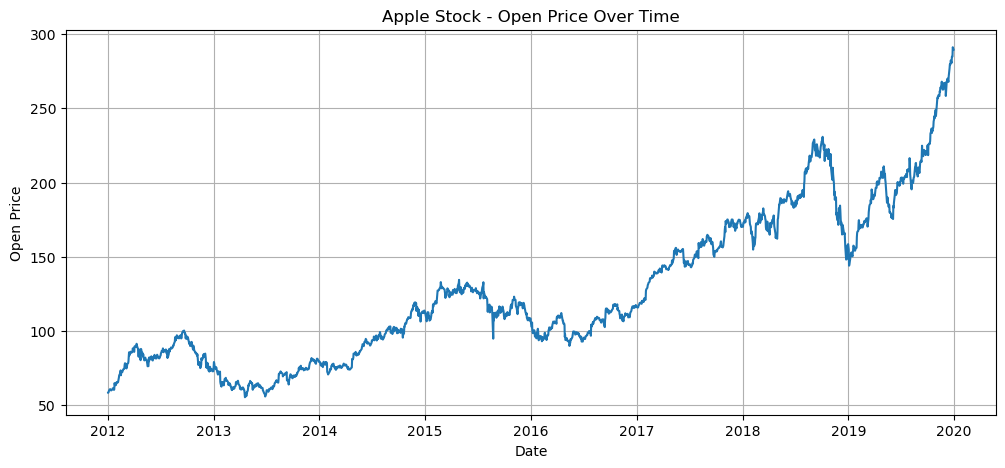

'\nThe Open price shows a clear upward trend over the period.\n'

In [20]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Open"])
plt.title("Apple Stock - Open Price Over Time")
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.grid(True)
plt.show()

'''
The Open price shows a clear upward trend over the period.
'''

##  High Price Over Time

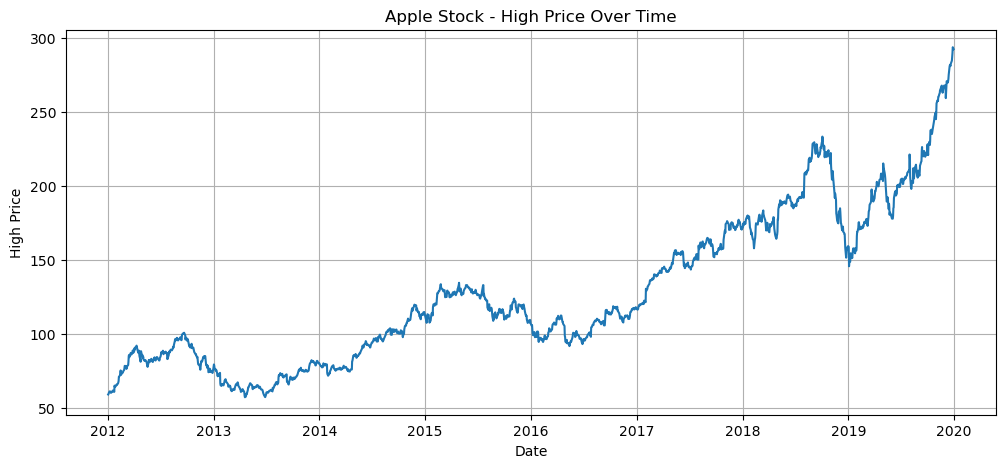

'\nHigh prices follow an overall rising trend with visible fluctuations.\n'

In [21]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["High"])
plt.title("Apple Stock - High Price Over Time")
plt.xlabel("Date")
plt.ylabel("High Price")
plt.grid(True)
plt.show()

'''
High prices follow an overall rising trend with visible fluctuations.
'''

## Low Price Over Time

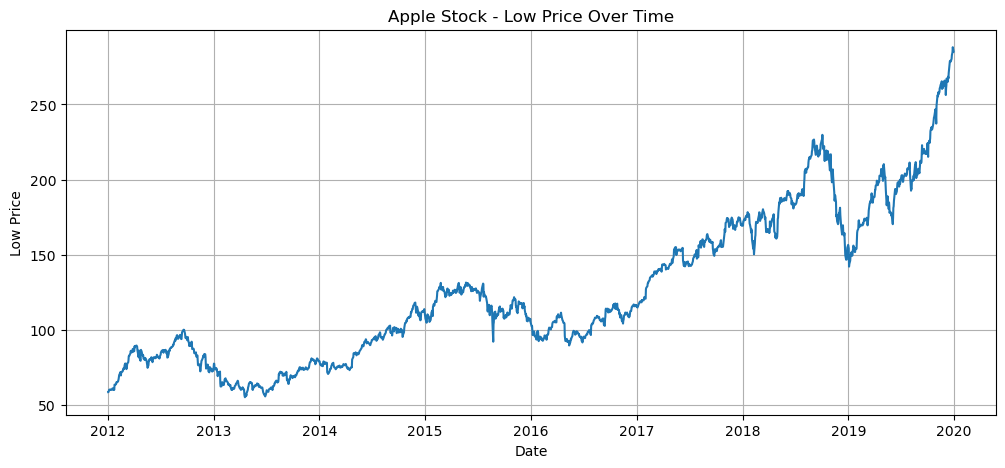

'\nThe Low prices also trend upward gradually.\n'

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Low"])
plt.title("Apple Stock - Low Price Over Time")
plt.xlabel("Date")
plt.ylabel("Low Price")
plt.grid(True)
plt.show()

'''
The Low prices also trend upward gradually.
'''


## Adjusted Close Price Over Time

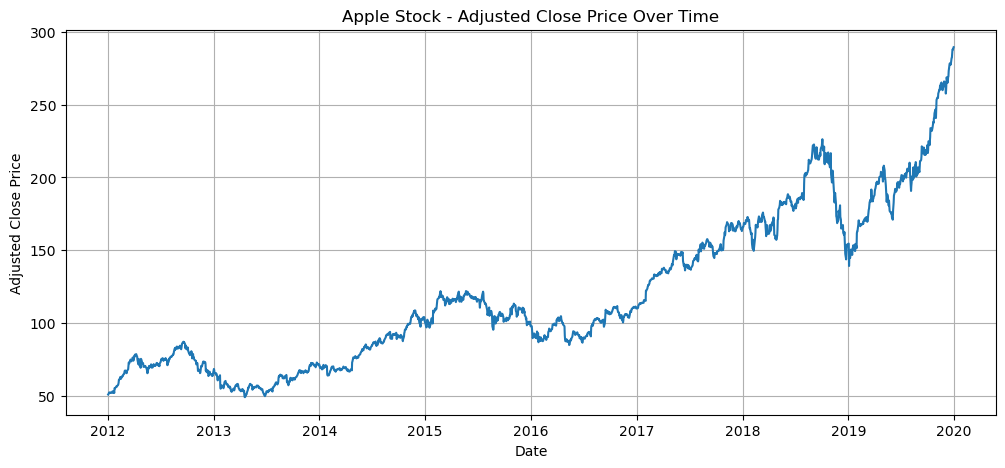

'\nAdjusted Close follows the same upward trend as Close price.\n'

In [23]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Adj Close"])
plt.title("Apple Stock - Adjusted Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.grid(True)
plt.show()
'''
Adjusted Close follows the same upward trend as Close price.
'''

## Feature Engineering

In [9]:
# Daily percentage return
df["Daily_Return"] = df["Close"].pct_change() * 100

#### We calculate daily returns to see how much the stock moves each day, helping us measure short-term performance and identify sudden price jumps or drops as required in the analysis.

In [10]:
# Log return (useful for modeling)
df["Log_Return"] = np.log(df["Close"] / df["Close"].shift(1))

#### In line with the need to prepare the dataset for more in-depth analysis, log returns enable us to compare returns consistently over time and are helpful for future modeling or forecasting.

In [11]:
# Moving averages on Close price
df["MA_20"] = df["Close"].rolling(window=20).mean()
df["MA_50"] = df["Close"].rolling(window=50).mean()

#### The 20-day moving average helps us understand the direction of the stock by displaying short-term trends and mitigating price fluctuations.

In [12]:
# 20-day rolling volatility (standard deviation of Daily_Return)
df["Volatility_20"] = df["Daily_Return"].rolling(window=20).std()

#### For the project's trend analysis, the 50-day moving average serves as a medium-term trend that facilitates the comparison of short- and long-term behaviors.

In [13]:
print("New columns added: Daily_Return, Log_Return, MA_20, MA_50, Volatility_20")
display(df.tail())

New columns added: Daily_Return, Log_Return, MA_20, MA_50, Volatility_20


,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Log_Return,MA_20,MA_50,Volatility_20
Date,,,,,,,,,,,
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,1.631834,0.016187,271.181998,259.6744,1.123160
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,0.095067,0.000950,272.076997,260.6424,1.079452
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,1.984035,0.019646,273.357997,261.7342,1.106245
2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,-0.037948,-0.000380,274.455997,262.8428,1.091848
2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600,0.593513,0.005918,275.669496,263.9676,1.082624


#### Volatility tells us how risky or stable the stock was in recent days. This helps meet the requirement to analyze stock behavior, risk, and fluctuations over time.

## Close Price With Moving Averages


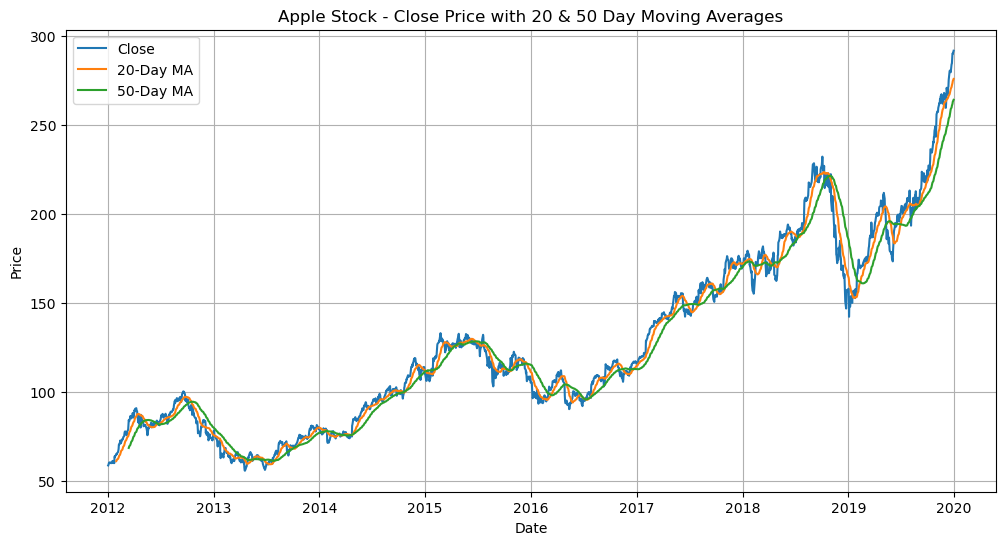

In [29]:

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Close")
plt.plot(df.index, df["MA_20"], label="20-Day MA")
plt.plot(df.index, df["MA_50"], label="50-Day MA")
plt.title("Apple Stock - Close Price with 20 & 50 Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

### 1.We plotted the Closing Price with the 20-day and 50-day Moving Averages to see short-term and medium-term trends clearly.
### 2.These lines help us understand whether the stock is generally moving up or down.
### 3.This is important for identifying major trend changes, which the project requires us to analyze.

## Daily Return Analysis


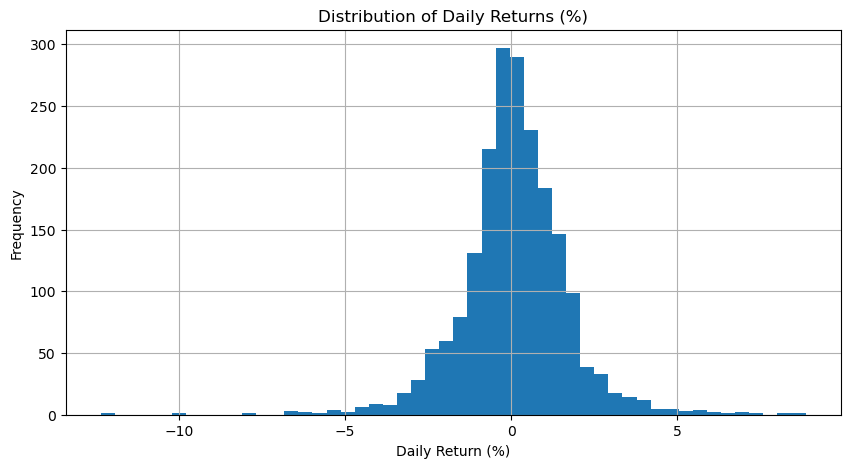

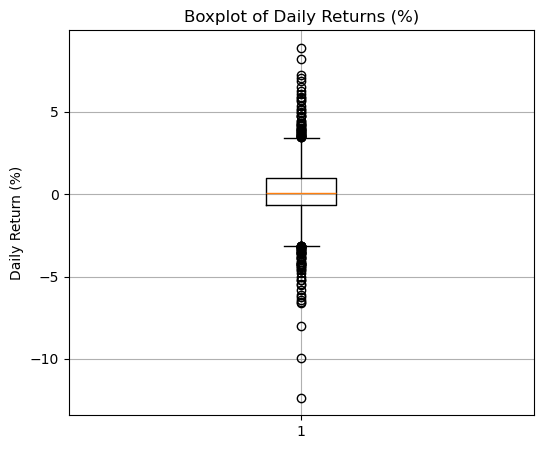

Daily return statistics:


count    2010.000000
mean        0.092755
std         1.612388
min       -12.355795
25%        -0.675187
50%         0.071546
75%         0.957123
max         8.874137
Name: Daily_Return, dtype: float64

'The histogram shows that most daily returns cluster around zero with a few extreme ups and downs.\nThe boxplot confirms this by highlighting the presence of outliers and the overall low spread in daily return values.\n'

In [30]:

returns = df["Daily_Return"].dropna()

plt.figure(figsize=(10, 5))
plt.hist(returns, bins=50)
plt.title("Distribution of Daily Returns (%)")
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 5))
plt.boxplot(returns, vert=True)
plt.title("Boxplot of Daily Returns (%)")
plt.ylabel("Daily Return (%)")
plt.grid(True)
plt.show()

print("Daily return statistics:")
display(returns.describe())

'''The histogram shows that most daily returns cluster around zero with a few extreme ups and downs.
The boxplot confirms this by highlighting the presence of outliers and the overall low spread in daily return values.
'''

### We plotted the histogram and boxplot of Daily Returns to understand how much Apple’s stock price changes on a typical day

#### 1.These charts allowed us to observe the distribution of daily price changes.
#### 2.They indicate whether the stock is highly volatile or typically stable.
#### 3.This aids in risk assessment and stock behavior analysis, both of which are necessary for the project.

# Rolling Volitality


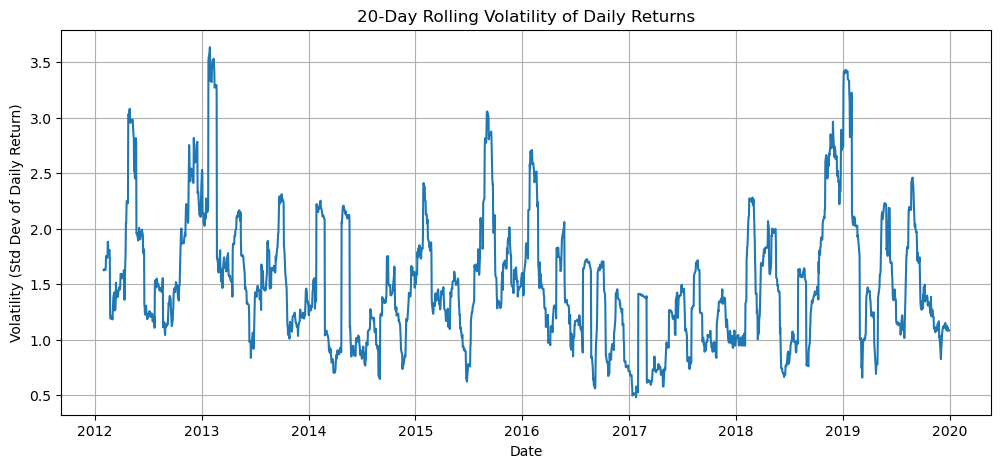

In [31]:

plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Volatility_20"])
plt.title("20-Day Rolling Volatility of Daily Returns")
plt.xlabel("Date")
plt.ylabel("Volatility (Std Dev of Daily Return)")
plt.grid(True)
plt.show()

#### 1.This graph illustrates how much Apple's daily returns changed over time; higher volatility denotes greater risk during those times.  
#### 2.It aids in our comprehension of the stock's level of stability.  
#### 3.The project's investigation of stock behavior and risk levels necessitates this analysis.

## Corelation Analysis


Correlation matrix:


,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Volatility_20
Open,1.000000,0.999782,0.999718,0.999496,0.998895,-0.557956,0.014677,-0.134527
High,0.999782,1.000000,0.999657,0.999748,0.999171,-0.554909,0.023773,-0.130454
Low,0.999718,0.999657,1.000000,0.999769,0.999179,-0.563426,0.026693,-0.139449
Close,0.999496,0.999748,0.999769,1.000000,0.999402,-0.559654,0.036874,-0.134958
Adj Close,0.998895,0.999171,0.999179,0.999402,1.000000,-0.566332,0.035419,-0.130973
Volume,-0.557956,-0.554909,-0.563426,-0.559654,-0.566332,1.000000,-0.063746,0.344059
Daily_Return,0.014677,0.023773,0.026693,0.036874,0.035419,-0.063746,1.000000,-0.019473
Volatility_20,-0.134527,-0.130454,-0.139449,-0.134958,-0.130973,0.344059,-0.019473,1.000000


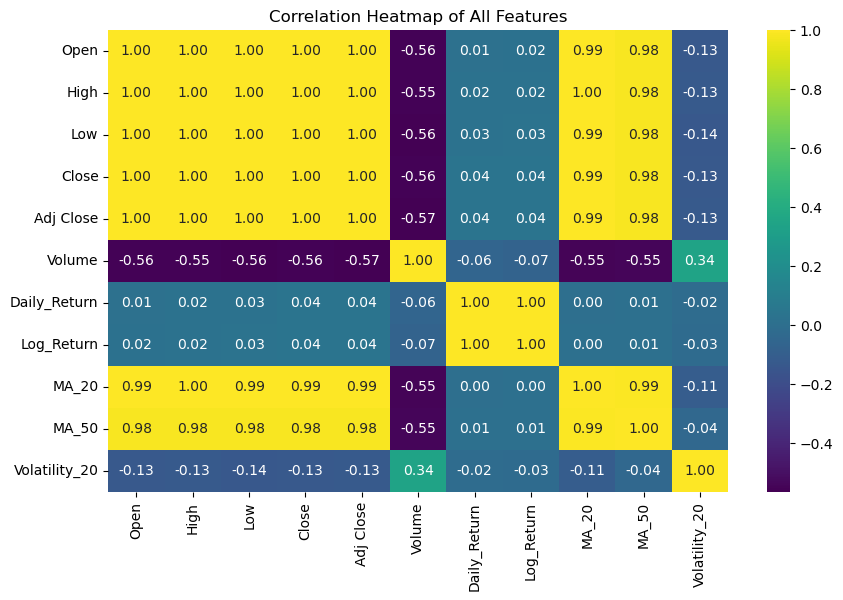

'\nAll price-related features (Open, High, Low, Close, Adj Close) are highly correlated (~0.99),\nmeaning they move together and carry similar information.\nVolume is weakly or negatively correlated with prices (around −0.5), showing that trading activity does not directly track price movements.\nDaily return has low correlation with prices, which is expected since it measures percentage change.\nRolling volatility also has very weak correlation with price features, showing that volatility behaves independently.\n'

In [32]:

cols = ["Open", "High", "Low", "Close", "Adj Close", "Volume",
        "Daily_Return", "Volatility_20"]

corr_matrix = df[cols].corr()

print("Correlation matrix:")
display(corr_matrix)

# Simple heatmap using matplotlib
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f",
            xticklabels=df.corr().columns,
            yticklabels=df.corr().columns)
plt.title("Correlation Heatmap of All Features")
plt.show()

'''
All price-related features (Open, High, Low, Close, Adj Close) are highly correlated (~0.99),
meaning they move together and carry similar information.
Volume is weakly or negatively correlated with prices (around −0.5), showing that trading activity does not directly track price movements.
Daily return has low correlation with prices, which is expected since it measures percentage change.
Rolling volatility also has very weak correlation with price features, showing that volatility behaves independently.
'''


#### We used the correlation matrix and heatmap to see how different stock features relate to each other.For example, we looked at how price movements are connected to returns or volatility.
#### This helps us understand which factors have the biggest impact on the stock.
#### It also supports the project goal of examining stock behavior and the relationships among key variables.

## RESAMPLING: Monthly & Yearly Trends


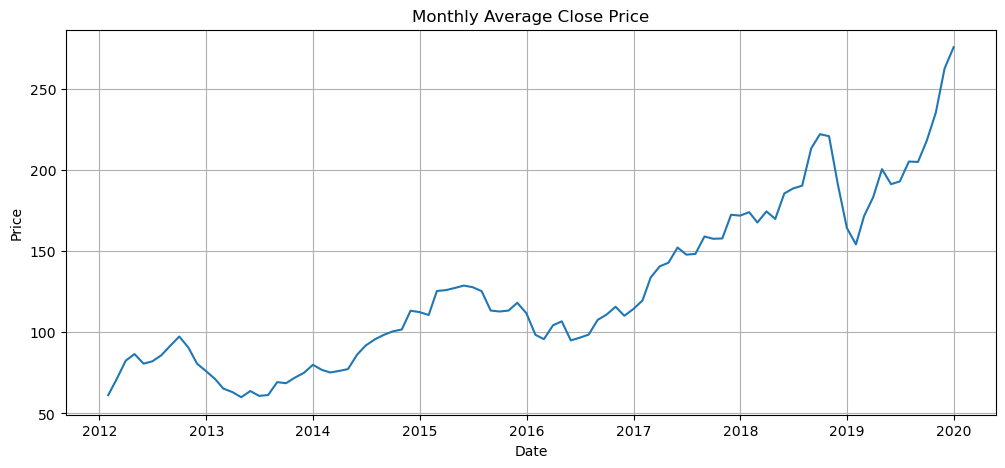

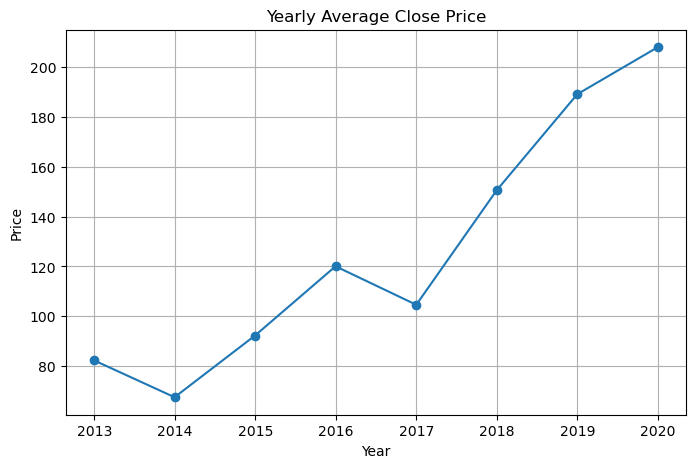

Yearly average close price:


Date
2012-12-31     82.292817
2013-12-31     67.519269
2014-12-31     92.264654
2015-12-31    120.040000
2016-12-31    104.604008
2017-12-31    150.551075
2018-12-31    189.053427
2019-12-31    207.915737
Freq: YE-DEC, Name: Close, dtype: float64

'\nMonthly average close price shows a steady upward trend with small fluctuations, meaning the stock grows consistently month-over-month with a few dips.\nYearly average close price clearly shows strong long-term growth, with the stock almost continuously increasing every year after 2014.\n'

In [33]:

# Monthly average closing price
monthly_close = df["Close"].resample("M").mean()

plt.figure(figsize=(12, 5))
plt.plot(monthly_close.index, monthly_close)
plt.title("Monthly Average Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# Yearly average closing price
yearly_close = df["Close"].resample("Y").mean()

plt.figure(figsize=(8, 5))
plt.plot(yearly_close.index, yearly_close, marker="o")
plt.title("Yearly Average Close Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid(True)
plt.show()

print("Yearly average close price:")
display(yearly_close)


'''
Monthly average close price shows a steady upward trend with small fluctuations, meaning the stock grows consistently month-over-month with a few dips.
Yearly average close price clearly shows strong long-term growth, with the stock almost continuously increasing every year after 2014.
'''

##### We looked at the monthly and yearly average closing prices to understand Apple’s long-term stock trends without the distraction of daily ups and downs.

##### The monthly averages show medium-term patterns, while the yearly averages make it easy to see the overall rise or fall of the stock. This helps us clearly understand the long-term behavior of the stock, which is an important part of the project.


## Time Series (Original, Trend, Seasonal, Residual)


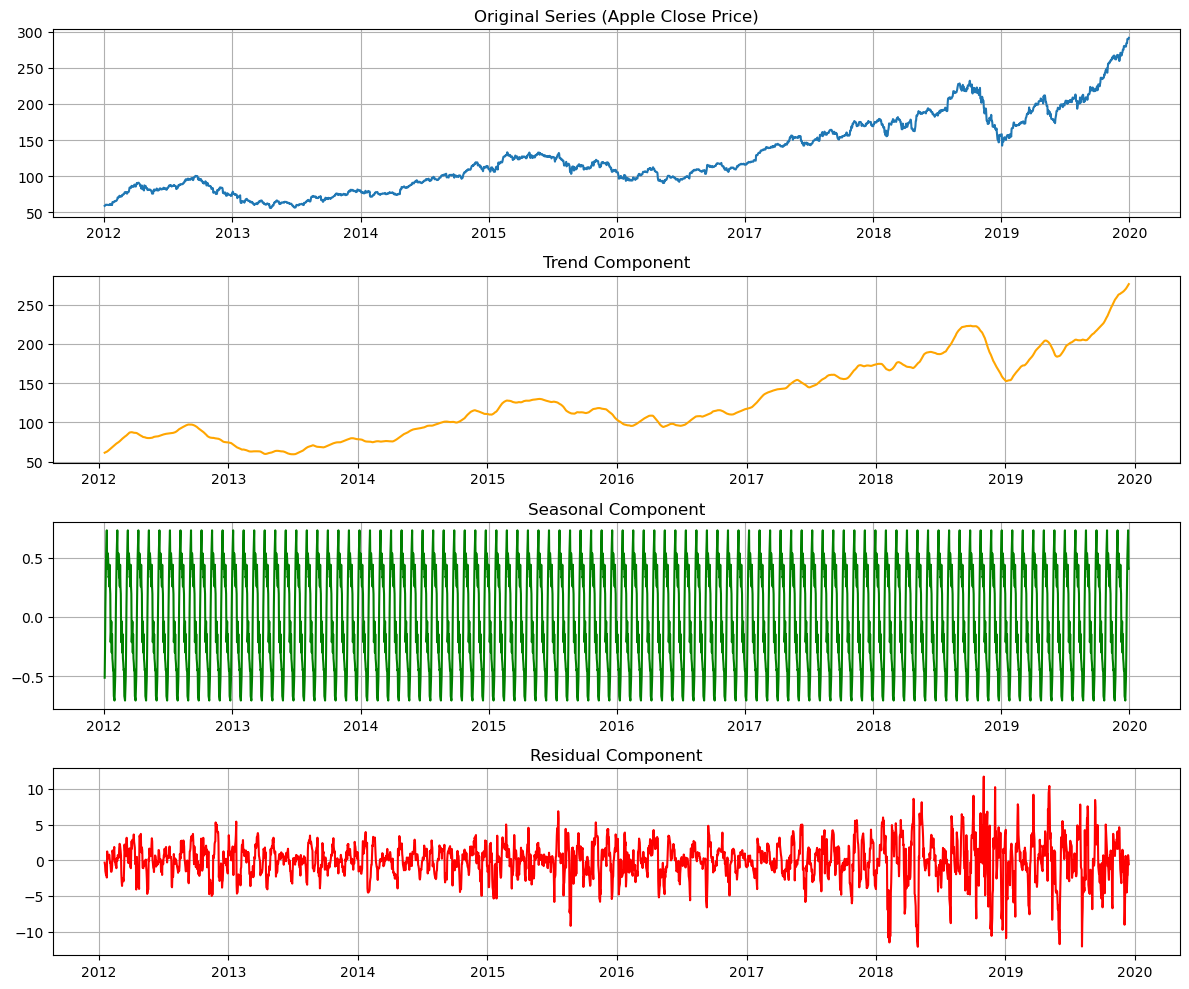

In [34]:

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Make sure the index is datetime and sorted
df = df.sort_index()

# Use Close price as a daily time series (fill missing days by forward fill)
ts = df["Close"].asfreq("D").fillna(method="ffill")

# Decompose the series - period=30 ~ monthly pattern
decomp_add = seasonal_decompose(ts, model="additive", period=30)

# Plot all components
plt.figure(figsize=(12, 10))

 ### ORGINAL SERIES
plt.subplot(4, 1, 1)
plt.plot(ts, label="Original")
plt.title("Original Series (Apple Close Price)")
plt.grid(True)

### TREND
plt.subplot(4, 1, 2)
plt.plot(decomp_add.trend, label="Trend", color="orange")
plt.title("Trend Component")
plt.grid(True)

### SEASONAL
plt.subplot(4, 1, 3)
plt.plot(decomp_add.seasonal, label="Seasonal", color="green")
plt.title("Seasonal Component")
plt.grid(True)

### RESIDUAL
plt.subplot(4, 1, 4)
plt.plot(decomp_add.resid, label="Residual", color="red")
plt.title("Residual Component")
plt.grid(True)

plt.tight_layout()
plt.show()


##### 1. We use time series decomposition to separate Apple’s stock price into trend, seasonal patterns, and random noise.
##### 2. This helps us understand how the stock behaves in the long term.
##### 3. It also reveals any repeating monthly or yearly patterns in the data.
##### 4. By isolating meaningful patterns from noise, we can build forecasting models that are more accurate and reliable.


###  Checking ADF test

In [14]:
# 1️ First difference to remove trend
df["Close_diff1"] = df["Close"].diff()

# 2️ Create time series with daily frequency
ts_diff = df["Close_diff1"].asfreq("D")

# 3️ Clean the series: remove NaN and infinite values
ts_diff = ts_diff.dropna()
ts_diff = ts_diff[np.isfinite(ts_diff)]

# 4️ Check if series has variation (not constant)
if ts_diff.nunique() > 1:
    print("Series is NOT constant — safe for ADF test.\n")
else:
    print("Series IS constant — ADF cannot run.")

Series is NOT constant — safe for ADF test.



#### so it is safe for adf test
#### We check if the differenced series has more than one unique value to make sure it isn’t constant.
#### If all the values are the same, the ADF test can’t run because there’s no variation in the data.

### Augemented Dickey-Fuller (ADF) Stationary Test


In [15]:
#  Ensure the series has variation
if ts_diff.nunique() > 1:
    print("Series is NOT constant — safe for ADF test.\n")
    
    # 1️ Run ADF test
    adf_diff_result = adfuller(ts_diff)
    
    # 2️ Print ADF test results
    print("ADF Test After First Differencing")
    print(f"ADF Statistic: {adf_diff_result[0]}")
    print(f"p-value      : {adf_diff_result[1]}")
    print("Critical Values:")
    for key, value in adf_diff_result[4].items():
        print(f"   {key}: {value}")
    
    # 3 Interpret the result
    if adf_diff_result[1] < 0.05:
        print("\nConclusion: The differenced series IS stationary (p < 0.05).")
    else:
        print("\nConclusion: Still not stationary — consider second differencing.")
else:
    print("\nERROR: Differenced series is constant — cannot run ADF.")

Series is NOT constant — safe for ADF test.

ADF Test After First Differencing
ADF Statistic: -13.625534323873252
p-value      : 1.7631231987209785e-25
Critical Values:
   1%: -3.433622218212895
   5%: -2.8629854902259004
   10%: -2.5675395171404802

Conclusion: The differenced series IS stationary (p < 0.05).


#### 1.This code runs the ADF test on the first-differenced Close price to check if the data has become stationary
#### 2.It cleans the series by removing invalid values and makes sure it isn’t constant before testing.
#### 3.Since the p-value is below 0.05, the results show that the series is stationary and ready for forecasting models like ARIMA.

## MODEL BUILDING AND EVALUATION

### 1.ARIMA

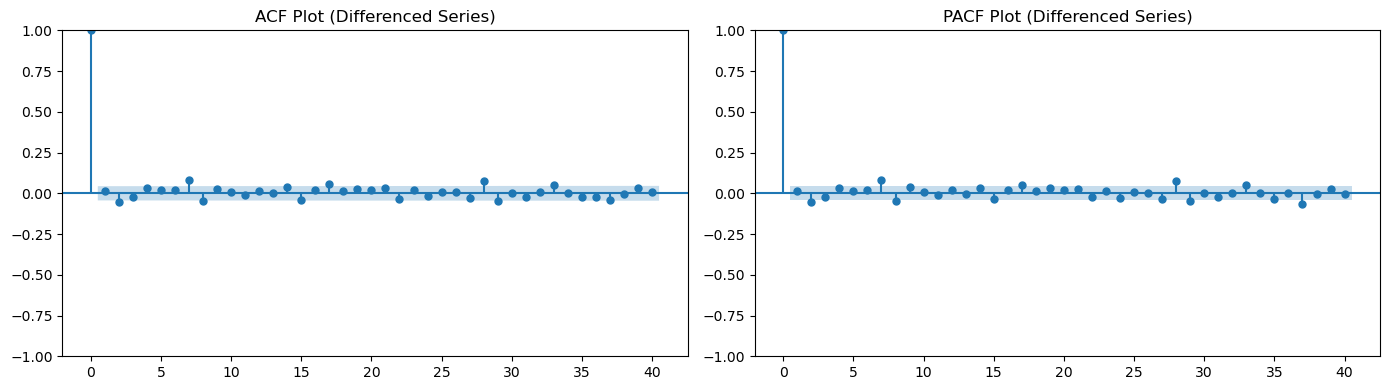

'\nInterpretation of ACF & PACF (after first differencing)\nI plotted the ACF and PACF for the differenced series to identify ARIMA model parameters.\nIn both ACF and PACF plots:\nOnly lag-0 spike is large (always 1 because the series correlates with itself).\nAll other spikes fall inside the confidence band.\nSince there is no significant spike in ACF, the MA part is 0 → q = 0.\nSince there is no significant spike in PACF, the AR part is 0 → p = 0.\nI already differenced once (d = 1) to make the series stationary.\nFinal Selected Model:\n ARIMA(0, 1, 0)\n '

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.close('all')

# choose lags sensibly
max_lags = min(40, len(ts_diff) - 1)

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(ts_diff, lags=max_lags, ax=axes[0], alpha=0.05)
axes[0].set_title("ACF Plot (Differenced Series)")

plot_pacf(ts_diff, lags=max_lags, ax=axes[1], alpha=0.05, method='ywm')
axes[1].set_title("PACF Plot (Differenced Series)")

plt.tight_layout()
plt.show()

'''
Interpretation of ACF & PACF (after first differencing)
I plotted the ACF and PACF for the differenced series to identify ARIMA model parameters.
In both ACF and PACF plots:
Only lag-0 spike is large (always 1 because the series correlates with itself).
All other spikes fall inside the confidence band.
Since there is no significant spike in ACF, the MA part is 0 → q = 0.
Since there is no significant spike in PACF, the AR part is 0 → p = 0.
I already differenced once (d = 1) to make the series stationary.
Final Selected Model:
 ARIMA(0, 1, 0)
 '''

In [15]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Log_Return,MA_20,MA_50,Volatility_20
Date,,,,,,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,NaN,NaN,NaN,NaN,NaN
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,0.537415,0.005360,NaN,NaN,NaN
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,1.110193,0.011041,NaN,NaN,NaN
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,1.045380,0.010400,NaN,NaN,NaN
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,-0.158617,-0.001587,NaN,NaN,NaN


In [39]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

df.index = pd.to_datetime(df.index)
df = df.asfreq('B')
df = df.dropna()

ts = df["Close"]
train_size = int(len(ts) * 0.80)
train, test = ts[:train_size], ts[train_size:]

p, d, q = 0, 1, 0   # Based on ACF/PACF results

model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1569
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3021.629
Date:                Wed, 17 Dec 2025   AIC                           6045.257
Time:                        16:39:59   BIC                           6050.615
Sample:                             0   HQIC                          6047.249
                               - 1569                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.7628      0.058     47.293      0.000       2.648       2.877
Ljung-Box (L1) (Q):                   2.49   Jarque-Bera (JB):               905.45
Prob(Q):                              0.11   Pr

C:\Users\saksh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saksh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saksh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [40]:
predictions = model_fit.forecast(steps=len(test))

pred_df = pd.DataFrame({
    "Actual": test.values,
    "Predicted": predictions.values
}, index=test.index)

print(pred_df.head())

                Actual   Predicted
Date                              
2018-06-08  191.699997  193.460007
2018-06-11  191.229996  193.460007
2018-06-12  192.279999  193.460007
2018-06-13  190.699997  193.460007
2018-06-14  190.800003  193.460007


C:\Users\saksh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 24.3062578778626
RMSE: 32.3519227430061


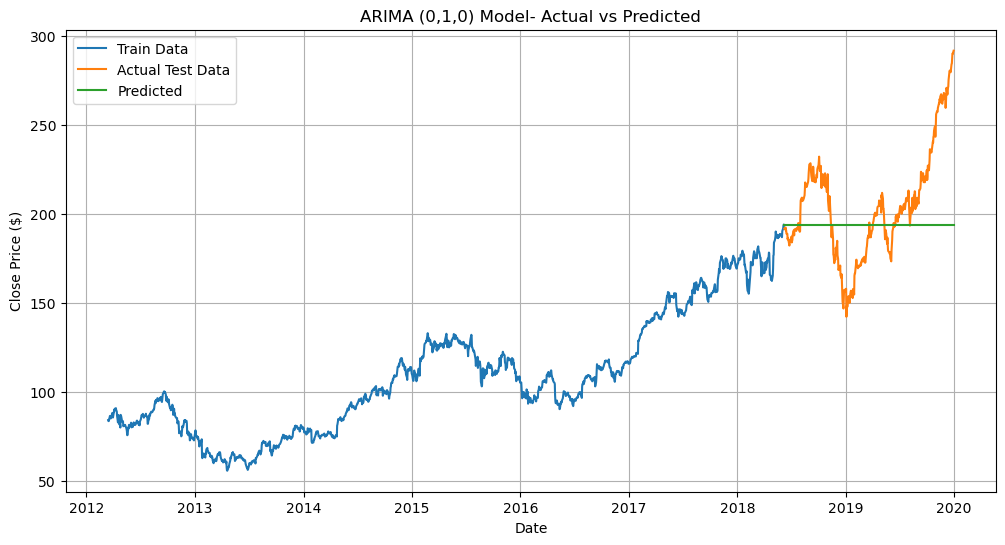

In [42]:
#  Plot Actual vs Predicted
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train Data")
plt.plot(test.index, test, label="Actual Test Data")
plt.plot(test.index, predictions, label="Predicted")
plt.title("ARIMA (0,1,0) Model- Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.legend()
plt.grid(True)
plt.show()

"""
ARIMA(0,1,0) gives a flat forecast that fails to capture the sharp fluctuations in the actual test data.
"""

In [43]:
# 6. Forecast next 30 days
forecast_30 = model_fit.forecast(steps=30)
last_date = df.index[-1]

future_dates = pd.date_range(start=last_date + pd.offsets.BDay(1),periods=30,freq='B')
forecast_30 = pd.Series(forecast_30.values, index=future_dates)

print("Next 30-day forecast:")
print(forecast_30)

Next 30-day forecast:
2019-12-31    193.460007
2020-01-01    193.460007
2020-01-02    193.460007
2020-01-03    193.460007
2020-01-06    193.460007
2020-01-07    193.460007
2020-01-08    193.460007
2020-01-09    193.460007
2020-01-10    193.460007
2020-01-13    193.460007
2020-01-14    193.460007
2020-01-15    193.460007
2020-01-16    193.460007
2020-01-17    193.460007
2020-01-20    193.460007
2020-01-21    193.460007
2020-01-22    193.460007
2020-01-23    193.460007
2020-01-24    193.460007
2020-01-27    193.460007
2020-01-28    193.460007
2020-01-29    193.460007
2020-01-30    193.460007
2020-01-31    193.460007
2020-02-03    193.460007
2020-02-04    193.460007
2020-02-05    193.460007
2020-02-06    193.460007
2020-02-07    193.460007
2020-02-10    193.460007
Freq: B, dtype: float64


C:\Users\saksh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 Simple model, easy to run, but underfitting → predictions are too smooth and less accurate.

### Best ARIMA (2,1,2) Model via Grid Search

In [44]:
import itertools
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import warnings

warnings.simplefilter("ignore", ConvergenceWarning)
warnings.filterwarnings("ignore")

p_values = range(0,4)
d_values = range(0,3)
q_values = range(0,4)

best_aic = np.inf
best_order = None
best_model = None

for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(train, order=(p,d,q))
        fitted = model.fit()
        
        if fitted.aic < best_aic:
            best_aic = fitted.aic
            best_order = (p,d,q)
            best_model = fitted
    except:
        continue

print("BEST MODEL:", best_order)
print("BEST AIC:", best_aic)

BEST MODEL: (2, 1, 2)
BEST AIC: 6037.829531848647


In [45]:
pred_test = best_model.forecast(steps=len(test))
pred_test = pd.Series(pred_test.values, index=test.index)

mae = mean_absolute_error(test, pred_test)
rmse = np.sqrt(mean_squared_error(test, pred_test))

print("GridSearch MAE:", mae)
print("GridSearch RMSE:", rmse)
'''
Test error (MAE/RMSE) slightly decreased compared to (0,1,0).
'''

GridSearch MAE: 24.329685035864095
GridSearch RMSE: 32.38641830480493


'\nTest error (MAE/RMSE) slightly decreased compared to (0,1,0).\n'

In [46]:
forecast_30 = best_model.forecast(steps=30)

last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1),
                             periods=30,
                             freq='B')

forecast_30 = pd.Series(forecast_30.values, index=future_dates)
print("Next 30-day forecast:")
print(forecast_30)

Next 30-day forecast:
2019-12-31    193.347346
2020-01-01    193.302067
2020-01-02    193.439877
2020-01-03    193.328611
2020-01-06    193.338062
2020-01-07    193.416299
2020-01-08    193.325221
2020-01-09    193.360402
2020-01-10    193.395127
2020-01-13    193.330102
2020-01-14    193.371996
2020-01-15    193.378867
2020-01-16    193.338268
2020-01-17    193.376182
2020-01-20    193.367912
2020-01-21    193.346646
2020-01-22    193.375929
2020-01-23    193.361531
2020-01-24    193.353664
2020-01-27    193.373498
2020-01-28    193.358556
2020-01-29    193.358771
2020-01-30    193.370404
2020-01-31    193.357807
2020-02-03    193.362028
2020-02-04    193.367520
2020-02-05    193.358302
2020-02-06    193.363789
2020-02-07    193.365245
2020-02-10    193.359334
Freq: B, dtype: float64


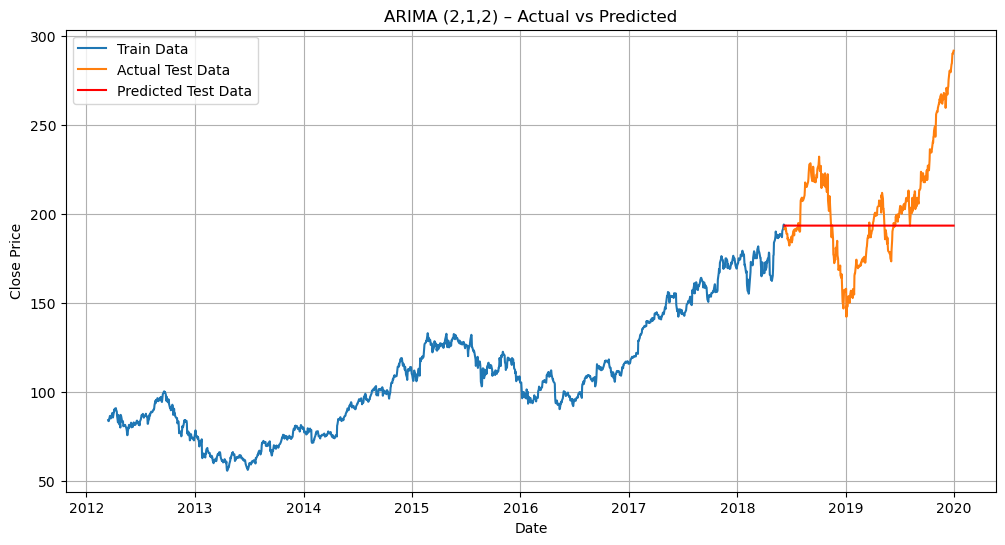

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train Data")
plt.plot(test.index, test, label="Actual Test Data")
plt.plot(pred_test.index, pred_test, label="Predicted Test Data", color='red')
plt.title("ARIMA (2,1,2) – Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

#### Predictions are flat and did not follow the trend → visually poor overlap with actual test data.

### Rolling-Block Forecast on ARIMA (2,1,2)

In [48]:
history = train.copy()
predictions = []

block_size = 5  # or 10
test_len = len(test)

for start in range(0, test_len, block_size):
    end = min(start + block_size, test_len)
    block_actual = test.iloc[start:end]
    
    model = ARIMA(history, order=best_order)
    model_fit = model.fit()
    
    block_pred = model_fit.forecast(steps=len(block_actual))
    predictions.extend(block_pred)
    
    # Append actual block to history
    history = pd.concat([history, block_actual])
pred_series = pd.Series(predictions, index=test.index)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, pred_series)
rmse = np.sqrt(mean_squared_error(test, pred_series))

print("Rolling-block MAE:", mae)
print("Rolling-block RMSE:", rmse)
'''
Evaluation: MAE/RMSE reduced significantly compared to single-fit (2,1,2).
'''

Rolling-block MAE: 3.9503370445564747
Rolling-block RMSE: 5.18361415512413


'\nEvaluation: MAE/RMSE reduced significantly compared to single-fit (2,1,2).\n'

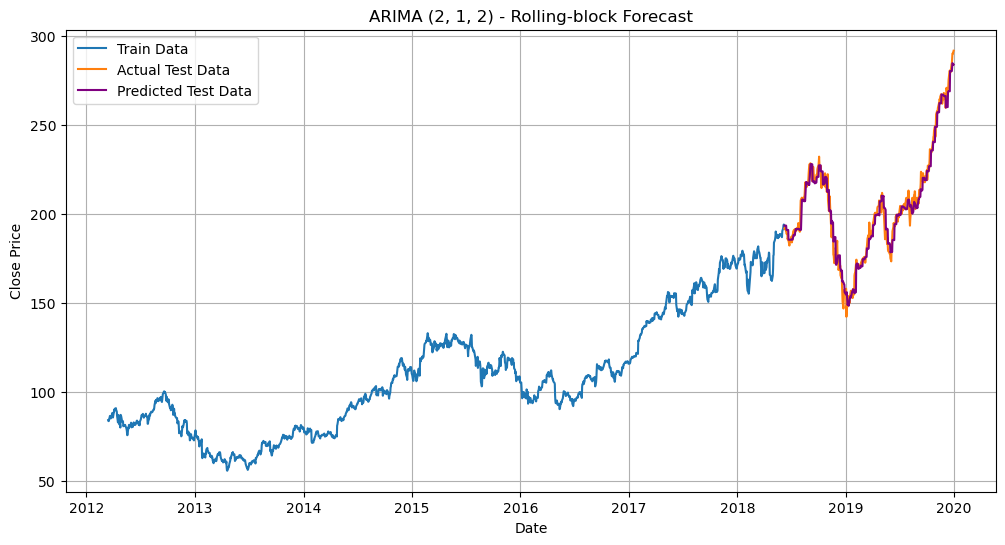

'\nPredictions now closer to actual trend → better visual overlap with test data.\n'

In [50]:
#  Plot Test Predictions

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train Data")
plt.plot(test.index, test, label="Actual Test Data")
plt.plot(test.index, pred_series, label="Predicted Test Data", color='purple')
plt.title(f"ARIMA {best_order} - Rolling-block Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

'''
Predictions now closer to actual trend → better visual overlap with test data.
'''

In [51]:
#  Forecast Next 30 Days
model = ARIMA(history, order=best_order)
model_fit = model.fit()
forecast_30 = model_fit.forecast(steps=30)

future_dates = pd.date_range(start=history.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
forecast_30 = pd.Series(forecast_30.values, index=future_dates)

print("\nNext 30-day forecast:")
print(forecast_30)


Next 30-day forecast:
2019-12-31    290.985255
2020-01-01    290.862625
2020-01-02    291.244654
2020-01-03    291.836535
2020-01-06    292.183588
2020-01-07    292.020540
2020-01-08    291.474279
2020-01-09    290.965125
2020-01-10    290.883420
2020-01-13    291.290278
2020-01-14    291.871909
2020-01-15    292.181621
2020-01-16    291.982875
2020-01-17    291.429931
2020-01-20    290.948130
2020-01-21    290.906712
2020-01-22    291.335849
2020-01-23    291.904729
2020-01-24    292.176566
2020-01-27    291.943959
2020-01-28    291.387121
2020-01-29    290.934271
2020-01-30    290.932328
2020-01-31    291.381152
2020-02-03    291.934904
2020-02-04    292.168526
2020-02-05    291.904008
2020-02-06    291.346014
2020-02-07    290.923537
2020-02-10    290.960090
Freq: B, dtype: float64


- The Apple stock closing price was modeled using ARIMA for time-series forecasting.
- Stationarity was confirmed using the ADF test, followed by ACF–PACF analysis.
- An exhaustive grid search over ARIMA (p, d, q) parameters was performed using AIC.
- Since standard k-fold cross-validation is not suitable for time-series data, rolling-block (rolling-origin) validation was used to evaluate model performance in blocks of multiple days.
- The best model selected was ARIMA(2,1,2), which showed improved MAE and RMSE on the test set when evaluated using the rolling-block forecast, compared to both ARIMA(0,1,0) and single-fit ARIMA(2,1,2).
- The final rolling-block ARIMA(2,1,2) model was trained on the full dataset and used to forecast the next 30 days, producing predictions that followed the actual trend more closely than single-fit forecasts.

### 2. SARIMA 

Starting Grid Search...
Best SARIMA order: (0, 1, 1)
Best seasonal order: (0, 1, 1, 7)
Starting Walk-Forward Validation...
Walk-Forward MAE: 2.51
Walk-Forward RMSE: 3.47


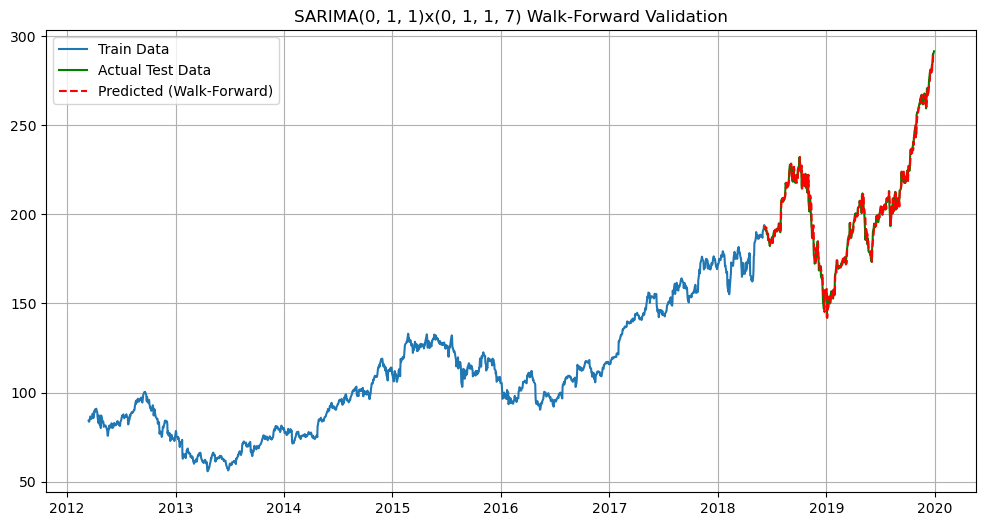

Next 30-Day Forecast (Mean and Confidence Intervals):
1962    291.520471
1963    291.830421
1964    291.336605
1965    292.364540
1966    292.817374
1967    292.973130
1968    293.852241
1969    293.836680
1970    294.146630
1971    293.652815
1972    294.680749
1973    295.133583
1974    295.289340
1975    296.168450
1976    296.152890
1977    296.462840
1978    295.969024
1979    296.996959
1980    297.449793
1981    297.605550
1982    298.484660
1983    298.469100
1984    298.779050
1985    298.285234
1986    299.313169
1987    299.766003
1988    299.921759
1989    300.800870
1990    300.785309
1991    301.095259
Name: mean, dtype: float64


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# 1. Setup and Suppress Warnings
warnings.simplefilter("ignore", ConvergenceWarning)
warnings.filterwarnings("ignore")

# Assuming 'train', 'test', and 'ts' (full series) are already defined pandas Series
# with a DatetimeIndex and frequency set. Example: ts.index.freq = 'D'

# 2. Define Hyperparameter Grid (Reduced ranges for performance)
p_values = range(0, 2) 
d_values = [1]          # Usually 1 for non-stationary data
q_values = range(0, 2)
P_values = range(0, 2)
D_values = [1]
Q_values = range(0, 2)
s_values = [7]          

# 3. Perform Grid Search
best_aic = np.inf
best_order = None
best_seasonal_order = None

print("Starting Grid Search...")
for p, d, q in itertools.product(p_values, d_values, q_values):
    for P, D, Q, s in itertools.product(P_values, D_values, Q_values, s_values):
        try:
            model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s),
                            enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = (p, d, q)
                best_seasonal_order = (P, D, Q, s)
        except:
            continue

print(f"Best SARIMA order: {best_order}")
print(f"Best seasonal order: {best_seasonal_order}")

# 4. Walk-forward validation
history = list(train)
predictions = []

print("Starting Walk-Forward Validation...")
for t in range(len(test)):
    # Using the best parameters found
    model = SARIMAX(history, order=best_order, seasonal_order=best_seasonal_order,
                    enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # Add actual observation to history for the next loop
    history.append(test.iloc[t])

predictions_series = pd.Series(predictions, index=test.index)

# 5. Evaluation
mae = mean_absolute_error(test, predictions_series)
rmse = np.sqrt(mean_squared_error(test, predictions_series))

print(f"Walk-Forward MAE: {mae:.2f}")
print(f"Walk-Forward RMSE: {rmse:.2f}")

# 6. Visualization
plt.figure(figsize=(12,6))
plt.plot(train, label="Train Data")
plt.plot(test, label="Actual Test Data", color="green")
plt.plot(predictions_series, label="Predicted (Walk-Forward)", color="red", linestyle='--')
plt.title(f"SARIMA{best_order}x{best_seasonal_order} Walk-Forward Validation")
plt.legend()
plt.grid(True)
plt.show()

# 7. Forecast next 30 days
final_model = SARIMAX(ts, order=best_order, seasonal_order=best_seasonal_order)
final_model_fit = final_model.fit(disp=False)
forecast_30 = final_model_fit.get_forecast(steps=30)
forecast_df = forecast_30.summary_frame()

print("Next 30-Day Forecast (Mean and Confidence Intervals):")
print(forecast_df['mean'])

"""
SARIMA with walk-forward validation closely tracks the actual test data, capturing trends and seasonality much better than ARIMA.
"""

The SARIMA model demonstrated strong forecasting performance by effectively capturing both trend and weekly seasonality in Apple’s stock prices. 
With a walk-forward MAE of 2.51 and RMSE of 3.47,  indicating high short-term predictive accuracy. 
The 30-day forecast showed stable and realistic price movements, reflecting the model’s robustness and consistency.

### 3. LSTM

In [16]:
df.index = pd.to_datetime(df.index)
df = df.asfreq('B')   # Business days (correct for stock data)
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Log_Return,MA_20,MA_50,Volatility_20
Date,,,,,,,,,,,
2012-03-14,82.578575,84.959999,82.199997,84.225716,72.782761,354711000.0,3.781026,0.037113,76.092143,68.581657,1.513718
2012-03-15,85.658569,85.715714,82.650002,83.651428,72.286484,289929500.0,-0.681844,-0.006842,76.719929,69.079743,1.378086
2012-03-16,83.531425,84.171425,82.571426,83.652855,72.287727,206371900.0,0.001706,0.000017,77.315357,69.571543,1.390055
2012-03-19,85.481430,85.967140,84.150002,85.871429,74.204872,225309000.0,2.652120,0.026176,78.022357,70.094600,1.436830
2012-03-20,85.644287,86.699997,84.497147,86.565712,74.804832,204165500.0,0.808515,0.008053,78.673143,70.619057,1.385196


In [17]:
ts = df['Close'] 
data = ts.to_frame() #Convert to DataFrame (needed for scaling)
# Train–Test Split
train_size = int(len(data) * 0.80)
train = data[:train_size]
test = data[train_size:]

In [18]:
#Scaling (LSTM ONLY)
#Since LSTM models are based on gradient descent, feature scaling is mandatory to ensure stable and faster convergence.
#The Close price is scaled between 0 and 1 using MinMaxScaler.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [19]:
# Sequence Creation (LSTM ONLY)
#LSTM networks require sequential input data.
#In this project, the past 60 days of Close prices are used to predict the next day’s Close price.
def create_sequences(data, window=60):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled, 60)
X_test, y_test = create_sequences(test_scaled, 60)

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(60,1)))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1)) #Since stock price prediction is a regression problem, I used a linear activation in the output layer.

model.compile(optimizer='adam', loss='mse')

In [22]:
#Model Training
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - loss: 0.0203 - val_loss: 0.0068
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0029 - val_loss: 0.0096
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0027 - val_loss: 0.0077
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0026 - val_loss: 0.0052
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0024 - val_loss: 0.0047
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0024 - val_loss: 0.0079
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0022 - val_loss: 0.0063
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0020 - val_loss: 0.0054
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0022 - val_loss: 0.0051
Epoch 10/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0020 - val_loss: 0.0117
Epoch 11/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0021 - val_loss: 0.0037
Epoch 12/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0

In [25]:
#Predictions
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)

actual = scaler.inverse_transform(y_test.reshape(-1,1))

#Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))

print("LSTM MAE:", mae)
print("LSTM RMSE:", rmse)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step 
LSTM MAE: 8.228882560590861
LSTM RMSE: 9.863057979615839


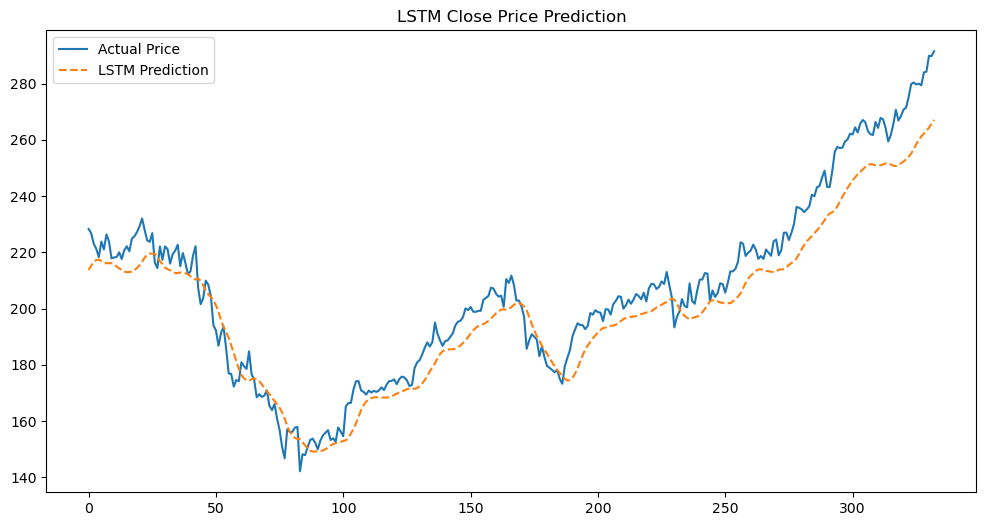

In [27]:
#Visualization
plt.figure(figsize=(12,6))
plt.plot(actual, label='Actual Price')
plt.plot(predicted, label='LSTM Prediction', linestyle='--')
plt.title('LSTM Close Price Prediction')
plt.legend()
plt.show()
'''
The model is not able to capture sharp peaks and sudden drops accurately.
There is a visible lag between the actual and predicted values.
'''

#### Forecast Next 30 Days

In [28]:

last_60_days = data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

future_predictions = []

current_input = last_60_days_scaled.reshape(1,60,1)

for i in range(30):
    next_price = model.predict(current_input)[0][0]
    future_predictions.append(next_price)
    
    current_input = np.append(current_input[:,1:,:],
                               [[[next_price]]],
                               axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [29]:
#Inverse Scale
future_predictions = scaler.inverse_transform(
    np.array(future_predictions).reshape(-1,1)
)

In [31]:
#Final Output
forecast_dates = pd.date_range(
    start=data.index[-1],
    periods=31,
    freq='B'
)[1:]

forecast_df = pd.DataFrame(
    future_predictions,
    index=forecast_dates,
    columns=['Predicted_Close']
)

print(forecast_df)

            Predicted_Close
2019-12-31       268.560425
2020-01-01       267.580139
2020-01-02       265.580566
2020-01-03       262.976288
2020-01-06       260.057770
2020-01-07       257.014343
2020-01-08       253.964081
2020-01-09       250.976471
2020-01-10       248.089478
2020-01-13       245.321304
2020-01-14       242.677856
2020-01-15       240.158112
2020-01-16       237.757095
2020-01-17       235.467987
2020-01-20       233.283173
2020-01-21       231.194824
2020-01-22       229.195526
2020-01-23       227.278107
2020-01-24       225.436035
2020-01-27       223.663391
2020-01-28       221.954651
2020-01-29       220.304932
2020-01-30       218.709900
2020-01-31       217.165466
2020-02-03       215.668198
2020-02-04       214.214890
2020-02-05       212.802750
2020-02-06       211.429153
2020-02-07       210.091965
2020-02-10       208.789047


### Hyperparameter Tuning

Hyperparameter tuning was performed for the LSTM model by varying key parameters such as the number of units and training epochs. 

In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np

results = []

for units in [32, 50]:
    for epochs in [10]:   # keep VERY small
        
        model = Sequential()
        model.add(LSTM(units, input_shape=(X_train.shape[1], 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=32,
            validation_data=(X_test, y_test),
            verbose=0
        )

        preds = model.predict(X_test)
        preds = scaler.inverse_transform(preds)
        actual = scaler.inverse_transform(y_test.reshape(-1,1))

        rmse = np.sqrt(mean_squared_error(actual, preds))

        results.append({
            'Units': units,
            'Epochs': epochs,
            'RMSE': rmse
        })

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step 


In [24]:
results_df = pd.DataFrame(results)
results_df

,Units,Epochs,RMSE
0,32,10,15.190280
1,50,10,9.720404


Based on the hyperparameter tuning results, the LSTM model with 50 units achieved the lowest RMSE compared to the model with 32 units.

In [25]:
# Rebuild model with best units
final_lstm = Sequential()
final_lstm.add(LSTM(50, return_sequences=True, input_shape=(60,1)))
final_lstm.add(Dropout(0.2))
final_lstm.add(LSTM(50))
final_lstm.add(Dropout(0.2))
final_lstm.add(Dense(1))

final_lstm.compile(optimizer='adam', loss='mse')

In [26]:
history = final_lstm.fit(
    X_train, y_train,
    epochs=20,           # slightly higher for final training
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - loss: 0.0272 - val_loss: 0.0205
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0037 - val_loss: 0.0065
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0027 - val_loss: 0.0080
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0025 - val_loss: 0.0091
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0025 - val_loss: 0.0042
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0025 - val_loss: 0.0040
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0024 - val_loss: 0.0039
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0023 - val_loss: 0.0038
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0021 - val_loss: 0.0061
Epoch 10/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0020 - val_loss: 0.0049
Epoch 11/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0020 - val_loss: 0.0054
Epoch 12/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0

In [28]:
preds = final_lstm.predict(X_test)
preds = scaler.inverse_transform(preds)
actual = scaler.inverse_transform(y_test.reshape(-1,1))

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(actual, preds)
rmse = np.sqrt(mean_squared_error(actual, preds))

print("Final LSTM MAE:", mae)
print("Final LSTM RMSE:", rmse)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Final LSTM MAE: 5.96263234129833
Final LSTM RMSE: 7.889353390346547


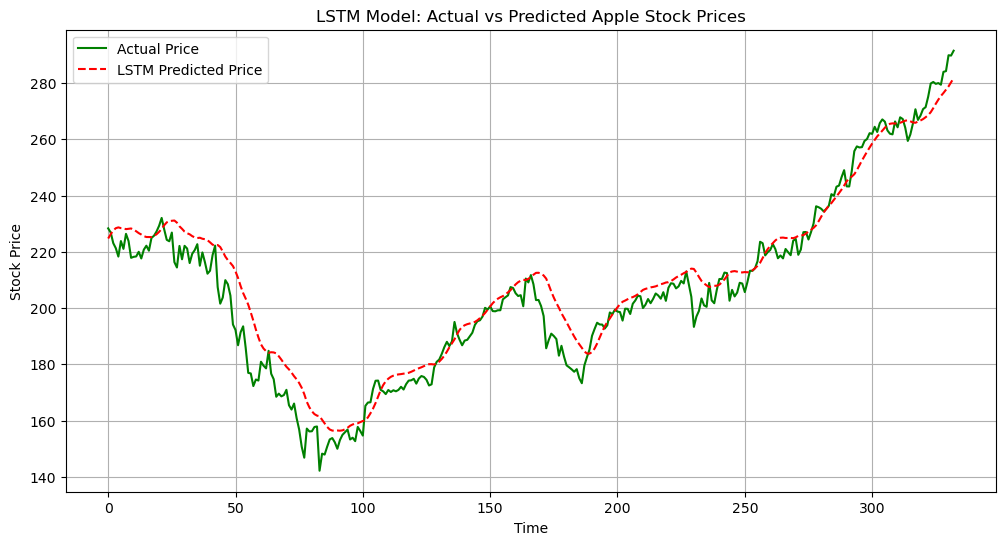

In [29]:
#Visualization: Actual vs Predicted
plt.figure(figsize=(12,6))
plt.plot(actual, label='Actual Price', color='green')
plt.plot(preds, label='LSTM Predicted Price', color='red', linestyle='--')
plt.title('LSTM Model: Actual vs Predicted Apple Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()
'''
The LSTM model accurately captures the overall trend of Apple stock prices, with slight smoothing and minor lag on sharp fluctuations.
'''

In [35]:
#Forecast Next 30 Days
forecast_dates = pd.date_range(start=ts.index[-1] + pd.Timedelta(days=1),periods=30,freq='B')

lstm_forecast_df = pd.DataFrame(future_predictions,index=forecast_dates,columns=['Predicted_Close'])
lstm_forecast_df

,Predicted_Close
2019-12-31,266.347931
2020-01-01,265.821472
2020-01-02,265.180634
2020-01-03,264.060394
2020-01-06,262.653046
2020-01-07,261.083466
2020-01-08,259.431641
2020-01-09,257.748352
2020-01-10,256.065643
2020-01-13,254.403091


Initial training without hyperparameter tuning resulted in higher forecasting error; however, after tuning the number of units and epochs, the model’s performance improved significantly, achieving an MAE of 5.96 and RMSE of 7.89. 
The 30-day forecast generated by the tuned LSTM model exhibited smooth trend continuation and realistic price movements, demonstrating its ability to generalize beyond the training period. 

### In this project, ARIMA, SARIMA, and LSTM models were developed and evaluated for forecasting Apple’s stock prices. 
-  ARIMA provided a baseline statistical approach but showed limitations in capturing complex trends. 
- SARIMA performed the best among traditional time series models due to its ability to model seasonality and achieved the lowest error values. 
- The LSTM model, although slightly less accurate than SARIMA in terms of RMSE, offered greater flexibility in modeling non-linear patterns and smoother future forecasts.

Based on quantitative evaluation and forecast stability, the SARIMA model was selected for deployment, as it provides superior accuracy and reliable short-term forecasts. 
Its statistical robustness and lower forecasting error make it well suited for integration into a Streamlit-based stock price forecasting application.